# Main Task file

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('CleanedData.csv') # Reading data

In [3]:
df

,accountNumber,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,isFraud
0,737265056,5000.0,5000.00,98.55,US,2.0,1.0,rideshare,414,414,PURCHASE,0.00,False,False
1,737265056,5000.0,5000.00,74.51,US,9.0,1.0,entertainment,486,486,PURCHASE,0.00,True,False
2,737265056,5000.0,5000.00,7.47,US,9.0,1.0,mobileapps,486,486,PURCHASE,0.00,False,False
3,737265056,5000.0,5000.00,7.47,US,9.0,1.0,mobileapps,486,486,PURCHASE,0.00,False,False
4,830329091,5000.0,5000.00,71.18,US,2.0,1.0,fastfood,885,885,PURCHASE,0.00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776666,732852505,50000.0,48904.96,119.92,US,90.0,1.0,rideshare,936,936,PURCHASE,1095.04,False,False
776667,732852505,50000.0,48785.04,18.89,US,9.0,1.0,online_subscriptions,939,939,PURCHASE,1214.96,False,False
776668,732852505,50000.0,48766.15,49.43,US,2.0,1.0,rideshare,936,936,PURCHASE,1233.85,False,False
776669,732852505,50000.0,48716.72,49.89,US,9.0,99.0,online_retail,939,939,PURCHASE,1283.28,False,False


In [4]:
df.info() # Checking null valea and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776671 entries, 0 to 776670
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   accountNumber         776671 non-null  int64  
 1   creditLimit           776671 non-null  float64
 2   availableMoney        776671 non-null  float64
 3   transactionAmount     776671 non-null  float64
 4   acqCountry            776671 non-null  object 
 5   posEntryMode          776671 non-null  float64
 6   posConditionCode      776671 non-null  float64
 7   merchantCategoryCode  776671 non-null  object 
 8   cardCVV               776671 non-null  int64  
 9   enteredCVV            776671 non-null  int64  
 10  transactionType       776671 non-null  object 
 11  currentBalance        776671 non-null  float64
 12  cardPresent           776671 non-null  bool   
 13  isFraud               776671 non-null  bool   
dtypes: bool(2), float64(6), int64(3), object(3)
memory u

In [5]:
# Conversion to numeric data

country = list(df.acqCountry.unique())
country
countryToNum = {}
numToCountry = {}
for i in range(len(country)):
    countryToNum[country[i]] = i
    numToCountry[i] = country[i]
countryToNum, numToCountry

({'US': 0, 'CAN': 1, 'MEX': 2, 'PR': 3},
 {0: 'US', 1: 'CAN', 2: 'MEX', 3: 'PR'})

In [6]:
# Conversion to numeric data

category = list(df.merchantCategoryCode.unique())
category
merchantCodeToNum = {}
numToMerchantCode = {}
for i in range(len(category)):
    merchantCodeToNum[category[i]] = i
    numToMerchantCode[i] = category[i]
merchantCodeToNum, numToMerchantCode

({'rideshare': 0,
  'entertainment': 1,
  'mobileapps': 2,
  'fastfood': 3,
  'food_delivery': 4,
  'auto': 5,
  'online_retail': 6,
  'gym': 7,
  'health': 8,
  'personal care': 9,
  'food': 10,
  'fuel': 11,
  'online_subscriptions': 12,
  'online_gifts': 13,
  'hotels': 14,
  'airline': 15,
  'furniture': 16,
  'subscriptions': 17,
  'cable/phone': 18},
 {0: 'rideshare',
  1: 'entertainment',
  2: 'mobileapps',
  3: 'fastfood',
  4: 'food_delivery',
  5: 'auto',
  6: 'online_retail',
  7: 'gym',
  8: 'health',
  9: 'personal care',
  10: 'food',
  11: 'fuel',
  12: 'online_subscriptions',
  13: 'online_gifts',
  14: 'hotels',
  15: 'airline',
  16: 'furniture',
  17: 'subscriptions',
  18: 'cable/phone'})

In [7]:
# Conversion to numeric data

transac = list(df.transactionType.unique())
transac
transactionTypeToNum = {}
numToTransactionType = {}
for i in range(len(transac)):
    transactionTypeToNum[transac[i]] = i
    numToTransactionType[i] = transac[i]
transactionTypeToNum, numToTransactionType

({'PURCHASE': 0, 'ADDRESS_VERIFICATION': 1, 'REVERSAL': 2},
 {0: 'PURCHASE', 1: 'ADDRESS_VERIFICATION', 2: 'REVERSAL'})

In [8]:
df.describe()

,accountNumber,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,currentBalance
count,7.766710e+05,776671.000000,776671.000000,776671.000000,776671.000000,776671.000000,776671.000000,776671.000000,776671.000000
mean,5.372359e+08,10756.179901,6247.586567,136.975563,9.051596,3.269411,544.517594,544.230211,4508.593334
std,2.553891e+08,11631.220754,8873.679496,147.696990,16.777805,9.792283,261.532040,261.561915,6457.238192
min,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000
25%,3.301333e+08,5000.000000,1077.520000,33.650000,2.000000,1.000000,310.000000,310.000000,689.980000
50%,5.074561e+08,7500.000000,3184.310000,87.890000,5.000000,1.000000,535.000000,535.000000,2451.720000
75%,7.676200e+08,15000.000000,7500.000000,191.500000,9.000000,1.000000,785.000000,785.000000,5289.100000
max,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,47498.810000


In [9]:
# Conversion to numeric data

df.acqCountry = [countryToNum[item] for item in df.acqCountry]
df.merchantCategoryCode = [merchantCodeToNum[item] for item in df.merchantCategoryCode]
df.transactionType = [transactionTypeToNum[item] for item in df.transactionType]
df

,accountNumber,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,isFraud
0,737265056,5000.0,5000.00,98.55,0,2.0,1.0,0,414,414,0,0.00,False,False
1,737265056,5000.0,5000.00,74.51,0,9.0,1.0,1,486,486,0,0.00,True,False
2,737265056,5000.0,5000.00,7.47,0,9.0,1.0,2,486,486,0,0.00,False,False
3,737265056,5000.0,5000.00,7.47,0,9.0,1.0,2,486,486,0,0.00,False,False
4,830329091,5000.0,5000.00,71.18,0,2.0,1.0,3,885,885,0,0.00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776666,732852505,50000.0,48904.96,119.92,0,90.0,1.0,0,936,936,0,1095.04,False,False
776667,732852505,50000.0,48785.04,18.89,0,9.0,1.0,12,939,939,0,1214.96,False,False
776668,732852505,50000.0,48766.15,49.43,0,2.0,1.0,0,936,936,0,1233.85,False,False
776669,732852505,50000.0,48716.72,49.89,0,9.0,99.0,6,939,939,0,1283.28,False,False


In [10]:
# Conversion to numeric data

df.cardPresent = [int(item) for item in df.cardPresent]
df.isFraud = [int(item) for item in df.isFraud]

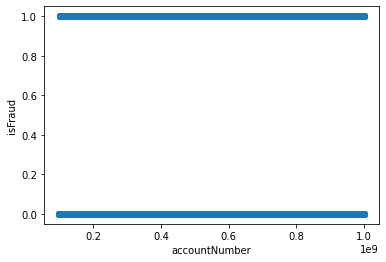

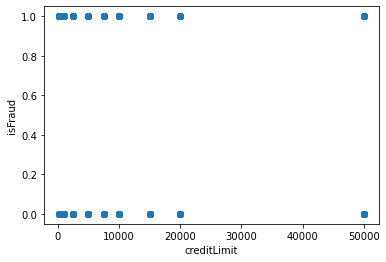

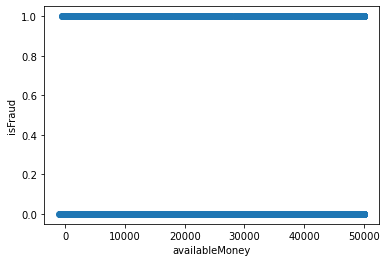

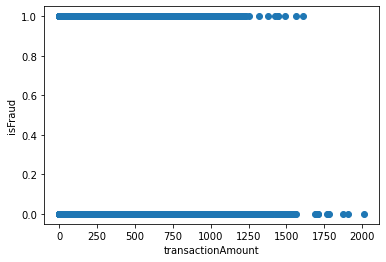

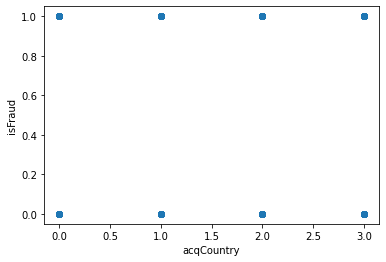

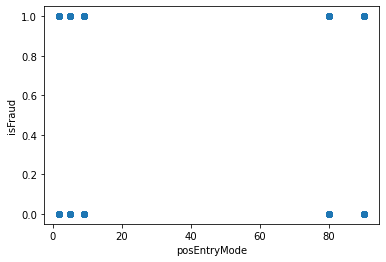

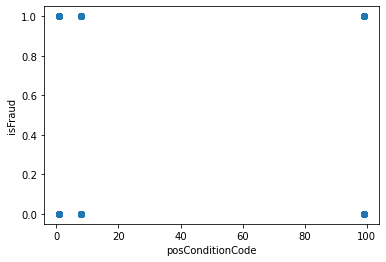

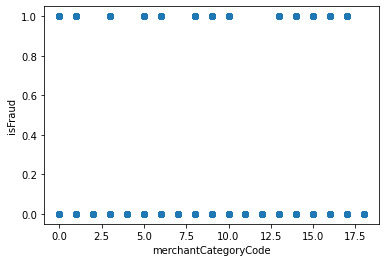

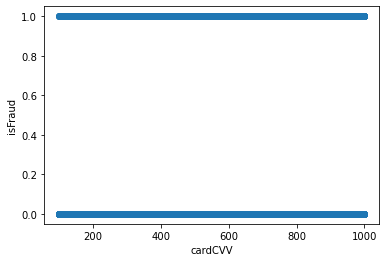

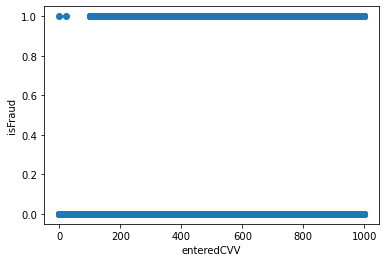

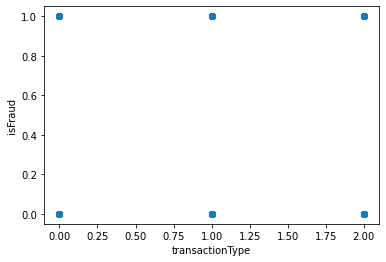

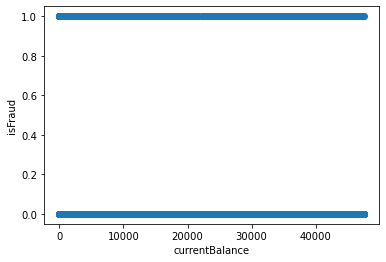

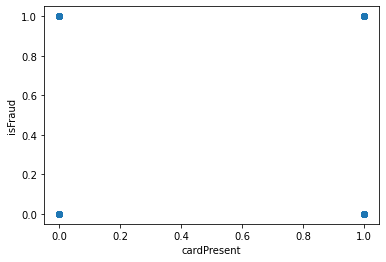

In [11]:
for col in df.columns[:-1]:
    plt.scatter(df[col], df.iloc[:, -1])
    plt.xlabel(col)
    plt.ylabel('isFraud')
    plt.show()

In [12]:
df

,accountNumber,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,isFraud
0,737265056,5000.0,5000.00,98.55,0,2.0,1.0,0,414,414,0,0.00,0,0
1,737265056,5000.0,5000.00,74.51,0,9.0,1.0,1,486,486,0,0.00,1,0
2,737265056,5000.0,5000.00,7.47,0,9.0,1.0,2,486,486,0,0.00,0,0
3,737265056,5000.0,5000.00,7.47,0,9.0,1.0,2,486,486,0,0.00,0,0
4,830329091,5000.0,5000.00,71.18,0,2.0,1.0,3,885,885,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776666,732852505,50000.0,48904.96,119.92,0,90.0,1.0,0,936,936,0,1095.04,0,0
776667,732852505,50000.0,48785.04,18.89,0,9.0,1.0,12,939,939,0,1214.96,0,0
776668,732852505,50000.0,48766.15,49.43,0,2.0,1.0,0,936,936,0,1233.85,0,0
776669,732852505,50000.0,48716.72,49.89,0,9.0,99.0,6,939,939,0,1283.28,0,0


In [13]:
df.corr()

,accountNumber,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,isFraud
accountNumber,1.000000,0.141070,0.066761,-0.001144,-0.003694,-0.001302,-0.001021,0.023700,-0.011428,-0.011387,-0.002057,0.162360,0.006202,-0.003614
creditLimit,0.141070,1.000000,0.834845,0.005721,-0.001758,-0.000823,-0.000144,0.101263,0.051466,0.051537,0.001779,0.654006,-0.003875,0.003424
availableMoney,0.066761,0.834845,1.000000,-0.009897,-0.002252,-0.000457,0.000538,0.048723,0.016795,0.016858,-0.004189,0.129558,0.002399,-0.001377
transactionAmount,-0.001144,0.005721,-0.009897,1.000000,-0.000190,0.003105,-0.000417,-0.011563,-0.000458,-0.000380,-0.065996,0.023906,0.037345,0.074360
acqCountry,-0.003694,-0.001758,-0.002252,-0.000190,1.000000,-0.000455,-0.000696,-0.001820,-0.000269,-0.000334,0.000364,-0.000072,-0.002721,0.002804
posEntryMode,-0.001302,-0.000823,-0.000457,0.003105,-0.000455,1.000000,-0.000685,0.000969,-0.002225,-0.002327,-0.000581,-0.000856,-0.001144,0.007889
posConditionCode,-0.001021,-0.000144,0.000538,-0.000417,-0.000696,-0.000685,1.000000,-0.001677,-0.000256,-0.000281,-0.002208,-0.001000,0.001538,0.008135
merchantCategoryCode,0.023700,0.101263,0.048723,-0.011563,-0.001820,0.000969,-0.001677,1.000000,0.094506,0.094053,-0.004071,0.115446,-0.097485,-0.001315
cardCVV,-0.011428,0.051466,0.016795,-0.000458,-0.000269,-0.002225,-0.000256,0.094506,1.000000,0.996031,0.000318,0.069623,-0.045521,0.008535
enteredCVV,-0.011387,0.051537,0.016858,-0.000380,-0.000334,-0.002327,-0.000281,0.094053,0.996031,1.000000,0.000298,0.069665,-0.045310,0.008503


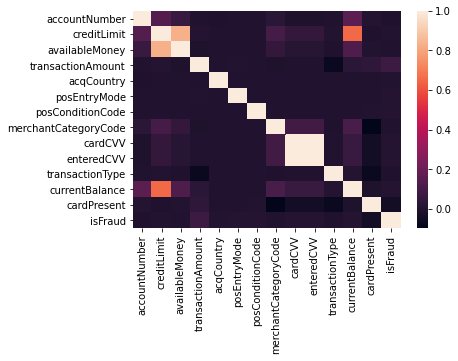

In [14]:
sns.heatmap(df.corr())

In [15]:
# X and Y 

X = df.iloc[:, : -1]
Y = df.iloc[:, -1]

In [16]:
# Splitting in train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, Y_train) # Training Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Prediction and accuracy

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)
print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)


Train Accuracy: 0.9845977055892464
Test Accuracy: 0.9845752727975021


# Thank you

# Chaudhary Hamdan
# ch.hamdan.edu@gmail.com
# 1905387@kiit.ac.in